<a href="https://colab.research.google.com/github/AlizaKunvar/RhombixTechnology_Task3/blob/main/Predicting_Credit_Card_Approvals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# 🔹 Step 1: Setup Google Colab & Upload Dataset
from google.colab import files
import zipfile, io, os

# Upload the Kaggle zip file
uploaded = files.upload()

# Dynamically get the uploaded filename (avoids hardcoding)
filename = list(uploaded.keys())[0]

# Extract it
with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
    zip_ref.extractall('/content')

# Check extracted files
print("Extracted files:", os.listdir('/content'))


Saving archive.zip to archive (3).zip
Extracted files: ['.config', 'archive (3).zip', 'archive (1).zip', 'credit_record.csv', 'application_record.csv.zip', 'archive (2).zip', 'application_record.csv', 'archive.zip', 'sample_data']


In [31]:
# 🔹 Step 2: Load Data
import pandas as pd

app_df = pd.read_csv("/content/application_record.csv")
credit_df = pd.read_csv("/content/credit_record.csv")

print("Application Data:\n", app_df.head())
print("\nCredit Data:\n", credit_df.head())


Application Data:
         ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apa

In [32]:
# 🔹 Step 3: Create Target Column (Approved / Not Approved)

# Late payment IDs (STATUS 1–5 means late)
late_ids = credit_df[credit_df['STATUS'].isin(['1','2','3','4','5'])]['ID'].unique()

# Add TARGET to application data
app_df['TARGET'] = app_df['ID'].apply(lambda x: 0 if x in late_ids else 1)

# Now our dataset has the target column
app_df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1


In [33]:
# 🔹 Step 4: Explore Data
app_df.info()
app_df.describe()
app_df.isnull().sum()
app_df['TARGET'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

,count
TARGET,
1,434266
0,4291


In [34]:
# 🔹 Step 5: Handle Missing Values
for col in app_df.columns:
    if app_df[col].dtype == 'object':
        app_df[col].fillna(app_df[col].mode()[0], inplace=True)
    else:
        app_df[col].fillna(app_df[col].median(), inplace=True)


/tmp/ipython-input-1361109978.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_df[col].fillna(app_df[col].median(), inplace=True)
/tmp/ipython-input-1361109978.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [35]:
# 🔹 Step 6: Encode Categorical Features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in app_df.select_dtypes(include=['object']).columns:
    app_df[col] = le.fit_transform(app_df[col])


In [36]:
# 🔹 Step 7: Split Features and Target
X = app_df.drop(["ID", "TARGET"], axis=1)  # remove ID, keep features
y = app_df["TARGET"]


In [37]:
# 🔹 Step 8: Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [38]:
# 🔹 Step 9: Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [39]:
# 🔹 Step 10: Handle Imbalanced Data
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [40]:
# 🔹 Step 11: Logistic Regression with GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_res, y_train_res)

print("Best Params:", grid.best_params_)


Best Params: {'C': 0.01, 'solver': 'saga'}


In [41]:
# 🔹 Step 12: Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = grid.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5622833819773805

Confusion Matrix:
 [[  419   439]
 [37954 48900]]

Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.49      0.02       858
           1       0.99      0.56      0.72     86854

    accuracy                           0.56     87712
   macro avg       0.50      0.53      0.37     87712
weighted avg       0.98      0.56      0.71     87712



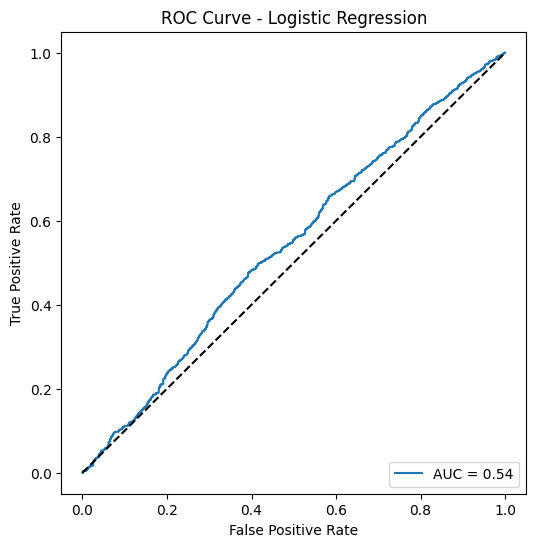

ROC AUC Score: 0.5411619883175597


In [42]:
# 🔹 Step 13: ROC Curve and AUC Score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get prediction probabilities
y_proba = grid.predict_proba(X_test)[:,1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Score:", auc_score)
